In [1]:
import plotly.graph_objects as go
import numpy as np

# import time
# import random
# import scipy.optimize
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data_df = pd.read_pickle("Kris_updated_yolov8.pkl")

In [3]:
data_df

,image name,car_count,timestamp_true
0,Kris_1206-1423.png,31,2023-06-12 14:23:00
1,Kris_1008-0950.png,32,2023-08-10 09:50:00
2,Kris_1108-0124.png,8,2023-08-11 01:24:00
3,Kris_2406-2128.png,6,2023-06-24 21:28:00
4,Kris_1006-0136.png,7,2023-06-10 01:36:00
...,...,...,...
963,Kris_1206-1252.png,24,2023-06-12 12:52:00
964,Kris_1006-1111.png,12,2023-06-10 11:11:00
965,Kris_0308-0805.png,0,2023-08-03 08:05:00
966,Kris_0806-2233.png,5,2023-06-08 22:33:00


In [4]:
data_df["timestamp_true"].loc[0]

Timestamp('2023-06-12 14:23:00')

In [5]:
data_df["Count"] = data_df["car_count"].astype("int")

data_df["num_timestamp"] = data_df["timestamp_true"].apply(lambda x: x.timestamp())

data_df.reset_index(inplace=True)

data_df["month_no"] = data_df["timestamp_true"].dt.month
data_df["month_name"] = data_df["timestamp_true"].dt.month_name()
data_df["day"] = data_df["timestamp_true"].dt.day
data_df["day_of_week"] = data_df["timestamp_true"].dt.dayofweek
data_df["day_of_week_name"] = data_df["timestamp_true"].dt.day_name()
data_df["is_weekend"] = np.where(
    data_df["timestamp_true"].isin(["Sunday", "Saturday"]), 1, 0
)
# data_df['week_no']=  data_df['timestamp_true'].dt.week

data_df["hour_of_day"] = data_df["timestamp_true"].dt.hour

data_df.drop(columns=["index"], inplace=True)

In [6]:
data_df.info(),

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 968 entries, 0 to 967
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   image name        968 non-null    object        
 1   car_count         968 non-null    int64         
 2   timestamp_true    968 non-null    datetime64[ns]
 3   Count             968 non-null    int64         
 4   num_timestamp     968 non-null    float64       
 5   month_no          968 non-null    int32         
 6   month_name        968 non-null    object        
 7   day               968 non-null    int32         
 8   day_of_week       968 non-null    int32         
 9   day_of_week_name  968 non-null    object        
 10  is_weekend        968 non-null    int64         
 11  hour_of_day       968 non-null    int32         
dtypes: datetime64[ns](1), float64(1), int32(4), int64(3), object(3)
memory usage: 75.8+ KB


(None,)

In [7]:
data_df.index

RangeIndex(start=0, stop=968, step=1)

In [8]:
data_df["timestamp_true"] = pd.to_datetime(data_df["timestamp_true"])
data_df.set_index("timestamp_true", inplace=True)

In [9]:
data_df.head()

,image name,car_count,Count,num_timestamp,month_no,month_name,day,day_of_week,day_of_week_name,is_weekend,hour_of_day
timestamp_true,,,,,,,,,,,
2023-06-12 14:23:00,Kris_1206-1423.png,31,31,1.686580e+09,6,June,12,0,Monday,0,14
2023-08-10 09:50:00,Kris_1008-0950.png,32,32,1.691661e+09,8,August,10,3,Thursday,0,9
2023-08-11 01:24:00,Kris_1108-0124.png,8,8,1.691717e+09,8,August,11,4,Friday,0,1
2023-06-24 21:28:00,Kris_2406-2128.png,6,6,1.687642e+09,6,June,24,5,Saturday,0,21
2023-06-10 01:36:00,Kris_1006-0136.png,7,7,1.686361e+09,6,June,10,5,Saturday,0,1


In [10]:
len(data_df["day"].unique())

20

In [11]:
# data_df.to_csv("/home/sofia_afn/Insync/sofiaa720@gmail.com/Google Drive/masters_thesis/code_v1/msc_parking/univrses/data/Kris_yolov8_data_preprocessed.csv")

In [12]:
# Distribution of Counts:

fig = go.Figure()
fig.add_trace(go.Histogram(x=data_df["Count"], nbinsx=40, name="Counts"))
fig.update_layout(
    title_text="Distribution of Counts", xaxis_title="Count", yaxis_title="Frequency"
)
fig.show()

In [13]:
# Counts Over Time --> if the day of the week has any impact on the counts
fig = go.Figure()
fig.add_trace(
    go.Box(
        x=data_df["day_of_week_name"], y=data_df["Count"], name="Counts by Day of Week"
    )
)
fig.update_layout(
    title_text="Counts by Day of Week", xaxis_title="Day of Week", yaxis_title="Count"
)
fig.show()

In [14]:
# Counts by Hour of Day
fig = go.Figure()
fig.add_trace(
    go.Box(x=data_df["hour_of_day"], y=data_df["Count"], name="Counts by Hour of Day")
)
fig.update_layout(
    title_text="Counts by Hour of Day", xaxis_title="Hour of Day", yaxis_title="Count"
)
fig.show()

In [15]:
# Counts by Day of Month
fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=data_df["day"],
        y=data_df["Count"],
        mode="markers",
        name="Counts by Day of Month",
    )
)
fig.update_layout(
    title_text="Counts by Day of Month", xaxis_title="Day of Month", yaxis_title="Count"
)
fig.show()

In [16]:
# Trend over timestamp for Count

trace = go.Scatter(
    x=data_df["num_timestamp"], y=data_df["Count"], mode="lines", name="Count"
)

data = [trace]


layout = go.Layout(
    title="Trend over time for Count",
    xaxis=dict(title="Timestamp"),
    yaxis=dict(title="Count"),
)


fig = go.Figure(data=data, layout=layout)


fig.show()

In [1]:
# Date trend for Count

data_df["date"] = data_df.index.date


fig = go.Figure()

fig.add_trace(go.Box(x=data_df["date"], y=data_df["Count"], name="Count per day"))

fig.update_layout(
    title="Trend over Date for Count",
    xaxis_title="Date",
    yaxis_title="Count",
    autosize=True,
)

fig.show()

NameError: name 'data_df' is not defined

<h1> GPR fit

In [18]:
# Helper functions


def plot_gpr_samples(x, gpr_model, n_samples, ax):
    """Plot samples drawn from the Gaussian process model.

    If the Gaussian process model is not trained then the drawn samples are
    drawn from the prior distribution. Otherwise, the samples are drawn from
    the posterior distribution. Be aware that a sample here corresponds to a
    function.

    Parameters
    ----------
    gpr_model : `GaussianProcessRegressor`
        A :class:`~sklearn.gaussian_process.GaussianProcessRegressor` model.
    n_samples : int
        The number of samples to draw from the Gaussian process distribution.
    ax : matplotlib axis
        The matplotlib axis where to plot the samples.
    """
    # x = np.linspace(0, 5, 100)
    X = x.reshape(-1, 1)

    y_mean, y_std = gpr_model.predict(X, return_std=True)
    y_samples = gpr_model.sample_y(X, n_samples)

    for idx, single_prior in enumerate(y_samples.T):
        ax.plot(
            x,
            single_prior,
            linestyle="--",
            alpha=0.7,
            label=f"Sampled function #{idx + 1}",
        )
    ax.plot(x, y_mean, color="black", label="Mean")
    ax.fill_between(
        x,
        y_mean - y_std,
        y_mean + y_std,
        alpha=0.1,
        color="black",
        label=r"$\pm$ 1 std. dev.",
    )
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_ylim([-3, 3])


def gpr_train(kernel, x_train, y_train, x_test):
    # Create the GPR model
    gpr = GaussianProcessRegressor(kernel=kernel)
    # Fit the GPR model to the training data
    gpr.fit(x_train, y_train)

    # Perform predictions using the trained GPR model
    y_pred, y_std = gpr.predict(x_test, return_std=True)
    # y_pred: Predicted target values
    # y_std: Standard deviation of predictions

    # Access learned model properties
    kernel_params = gpr.kernel_  # Learned kernel parameters
    # noise_level = gpr.kernel_.get_params()['k2_noise_level']  # Estimated noise level (if available)
    noise_level = gpr.alpha_  # Estimated noise level (if available)

    # Print or analyze the results as needed
    print("Predicted values:", y_pred)
    print("Prediction uncertainty (std):", y_std)
    print("Learned kernel parameters:", kernel_params)
    print("Estimated noise level:", noise_level)

    return y_pred, y_std, kernel_params, noise_level, gpr


def plot_gpr_samples_plotly(x, gpr_model, n_samples, X_train, y_train):
    # x = np.linspace(0, 5, 100)
    X = x.reshape(-1, 1)

    y_mean, y_std = gpr_model.predict(X, return_std=True)
    y_samples = gpr_model.sample_y(X, n_samples)

    fig = go.Figure()

    for idx, single_prior in enumerate(y_samples.T):
        fig.add_trace(
            go.Scatter(
                x=x, y=single_prior, mode="lines", name=f"Sampled function #{idx + 1}"
            )
        )

    fig.add_trace(
        go.Scatter(
            x=x,
            y=y_mean,
            mode="lines",
            line_color="red",
            name="Mean",
            line=dict(dash="dash"),
        )
    )

    fig.add_trace(
        go.Scatter(
            x=x,
            y=y_mean - y_std,
            fill=None,
            mode="lines",
            line_color="rgba(255,0,0,0.1)",
            showlegend=False,
        )
    )

    fig.add_trace(
        go.Scatter(
            x=x,
            y=y_mean + y_std,
            fill="tonexty",
            mode="lines",
            line_color="rgba(173, 216, 230, 0.5)",
            name=r"uncertainty",
        )
    )

    fig.add_trace(
        go.Scatter(
            x=X_train.ravel(),
            y=y_train.ravel(),
            mode="markers",
            name="Training Data",
            marker=dict(color="black"),
        )
    )

    fig.update_layout(
        xaxis_title="x",
        yaxis_title="y",
        autosize=True,
    )

    fig.show()


def plot_a_day(data_df, date: int, mode: str):
    day = f"2023-06-{date}"
    day_slice = data_df.loc[day]

    fig = go.Figure()

    fig.add_trace(
        go.Scatter(x=day_slice["hour_of_day"], y=day_slice["Count"], mode=mode)
    )
    fig.update_layout(
        title=f"{day_slice['day'][1]} {day_slice['month_name'][1]}",
        xaxis_title="hour_of_day",
        yaxis_title="Count",
    )

    # Set the range of the x and y axes
    fig.update_xaxes(range=[0, 24])  # assuming hour_of_day is in the range 0-24
    fig.update_yaxes(
        range=[0, max(day_slice["Count"]) * 1.1]
    )  # set y-axis range from 0 to 10% more than the maximum count

    fig.show()


def training_data_plot(
    X_train,
    y_train,
    x_label="X_train_whole",
    y_label="y_train_whole",
    title="Training Data",
    x_lim=[0, 24],
    y_lim=[0, 50],
    figsize=(10, 7),
):
    """
    Plots the training data.

    Parameters:
    - X_train_whole: The X values of the training data.
    - y_train_whole: The y values of the training data.
    - x_label: Label for the X-axis. Default is "X_train_whole".
    - y_label: Label for the Y-axis. Default is "y_train_whole".
    - title: Title of the plot. Default is "Training Data".
    - x_lim: Range for the X-axis. Default is [0, 24].
    - y_lim: Range for the Y-axis. Default is [0, 50].
    - figsize: Size of the figure. Default is (10, 7).
    """

    plt.figure(figsize=figsize)
    plt.scatter(X_train_whole, y_train_whole, color="red")
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Set the range of the x and y axes
    plt.xlim(x_lim)
    plt.ylim(y_lim)
    plt.grid(True)

    plt.show()

In [19]:
# day_df.plot(x="hour_of_day", y="Count")

<Axes: xlabel='hour_of_day', ylabel='Count'>

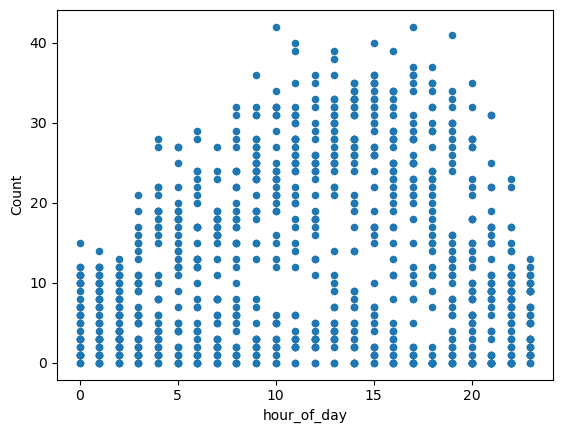

In [20]:
data_df.plot(x="hour_of_day", y="Count", kind="scatter")

In [21]:
x = np.linspace(0, 23, 100)
fig = go.Figure(data=go.Scatter(x=x, y=x, mode="markers"))

fig.show()

In [22]:
# Count agg by mean for hour of day
X_train_mean = data_df["hour_of_day"].values.reshape(-1, 1)
y_train_mean = data_df["Count"].values.reshape(-1, 1)
# x, X_train_mean, y_train_mean

In [23]:
n_samples = 5

In [24]:
# gpr trained model
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF


def train_gpr_with_kernel(
    X_train,
    y_train,
    x,
    n_samples,
    length_scale=1.0,
    length_scale_bounds=(1e-05, 1e15),
    random_state=0,
):
    kernel = 1.0 * RBF(
        length_scale=length_scale, length_scale_bounds=length_scale_bounds
    )
    gpr = GaussianProcessRegressor(kernel=kernel, random_state=random_state)

    # plot prior
    plot_gpr_samples_plotly(x, gpr, n_samples, X_train, y_train)

    # plot posterior
    gpr.fit(X_train, y_train)
    plot_gpr_samples_plotly(x, gpr, n_samples, X_train, y_train)

    print(f"Kernel parameters before fit:\n{kernel}")
    print(
        f"Kernel parameters after fit: \n{gpr.kernel_} \n"
        f"Log-likelihood: {gpr.log_marginal_likelihood(gpr.kernel_.theta):.3f}\n"
        f"Loss (NLML): {-gpr.log_marginal_likelihood(gpr.kernel_.theta):.3f}"
    )

    # y_mean, y_cov = gpr.predict(x.reshape(-1, 1), return_cov=True)

    # # Create a heatmap of the covariance matrix
    # heatmap = go.Heatmap(z=y_cov)
    # fig = go.Figure(data=[heatmap])
    # fig.show()

    return gpr

In [25]:
mean_gpr_rbf = train_gpr_with_kernel(
    X_train_mean,
    y_train_mean,
    x,
    n_samples=5,
    length_scale=1,
    length_scale_bounds=(1e-1, 50),
)

Kernel parameters before fit:
1**2 * RBF(length_scale=1)
Kernel parameters after fit: 
0.941**2 * RBF(length_scale=0.976) 
Log-likelihood: -465718858337039.688
Loss (NLML): 465718858337039.688


In [26]:
length_scale = 1.0
length_scale_bounds = (1e-05, 1e15)
random_state = 0

kernel = 1.0 * RBF(length_scale=length_scale, length_scale_bounds=length_scale_bounds)
gpr = GaussianProcessRegressor(kernel=kernel, random_state=random_state)

X_new = np.array([[12], [22]])
y_pred = gpr.predict(X_new)
for i, val in enumerate(y_pred):
    print(f"Prediction for input {X_new[i]}: {val}")

Prediction for input [12]: 0.0
Prediction for input [22]: 0.0


In [27]:
data_df

,image name,car_count,Count,num_timestamp,month_no,month_name,day,day_of_week,day_of_week_name,is_weekend,hour_of_day,date
timestamp_true,,,,,,,,,,,,
2023-06-12 14:23:00,Kris_1206-1423.png,31,31,1.686580e+09,6,June,12,0,Monday,0,14,2023-06-12
2023-08-10 09:50:00,Kris_1008-0950.png,32,32,1.691661e+09,8,August,10,3,Thursday,0,9,2023-08-10
2023-08-11 01:24:00,Kris_1108-0124.png,8,8,1.691717e+09,8,August,11,4,Friday,0,1,2023-08-11
2023-06-24 21:28:00,Kris_2406-2128.png,6,6,1.687642e+09,6,June,24,5,Saturday,0,21,2023-06-24
2023-06-10 01:36:00,Kris_1006-0136.png,7,7,1.686361e+09,6,June,10,5,Saturday,0,1,2023-06-10
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-12 12:52:00,Kris_1206-1252.png,24,24,1.686574e+09,6,June,12,0,Monday,0,12,2023-06-12
2023-06-10 11:11:00,Kris_1006-1111.png,12,12,1.686395e+09,6,June,10,5,Saturday,0,11,2023-06-10
2023-08-03 08:05:00,Kris_0308-0805.png,0,0,1.691050e+09,8,August,3,3,Thursday,0,8,2023-08-03
